In [40]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [41]:
train = pd.read_csv(r"C:\Users\nikhi\OneDrive\Desktop\train_Logistic.csv")



In [42]:
train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
663,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,1
664,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q,0
665,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,1
666,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,0


In [43]:
train.isnull()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
663,False,False,False,False,False,False,False,False,True,False,False
664,False,False,False,True,False,False,False,False,True,False,False
665,False,False,False,False,False,False,False,False,True,False,False
666,False,False,False,False,False,False,False,False,True,False,False


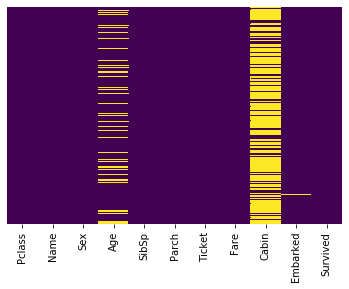

In [44]:
## using this we can find count of null value as a graph

import seaborn as sns
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
train.groupby('Pclass').mean()['Age'].round()

Pclass
1    37.0
2    30.0
3    26.0
Name: Age, dtype: float64

In [46]:
mean_class1 = train.groupby('Pclass').mean()['Age'].round().loc[1]
mean_class2 = train.groupby('Pclass').mean()['Age'].round().loc[2]
mean_class3 = train.groupby('Pclass').mean()['Age'].round().loc[3]

In [47]:
train.loc[train['Pclass']==1,'Age'] = train.loc[train['Pclass']==1,'Age'].fillna(value=mean_class1)
train.loc[train['Pclass']==2,'Age'] = train.loc[train['Pclass']==2,'Age'].fillna(value=mean_class2)
train.loc[train['Pclass']==3,'Age'] = train.loc[train['Pclass']==3,'Age'].fillna(value=mean_class3)

In [48]:
train.drop('Cabin',axis=1,inplace=True)

In [49]:
train.dropna(inplace=True) # dropping the 1 missing value in Embarked column

In [50]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)


In [51]:
train = pd.concat([train,sex,embark],axis=1)

In [52]:
train.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,male,Q,S
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.00,S,1,0,0,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,26.0,0,0,A/5 2466,8.05,S,0,1,0,1


In [35]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [55]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,2,29.0,1,0,26.000,1,0,0,1
1,3,26.0,0,0,8.050,0,1,0,1
2,2,39.0,0,0,26.000,0,1,0,1
3,3,29.0,0,4,21.075,0,0,0,1
4,3,25.0,0,0,7.050,0,1,0,1


In [56]:
test = pd.read_csv(r"C:\Users\nikhi\OneDrive\Desktop\test_Logistic.csv")

In [57]:
test.loc[test['Pclass']==1,'Age'] = test.loc[test['Pclass']==1,'Age'].fillna(value=mean_class1)
test.loc[test['Pclass']==2,'Age'] = test.loc[test['Pclass']==2,'Age'].fillna(value=mean_class2)
test.loc[test['Pclass']==3,'Age'] = test.loc[test['Pclass']==3,'Age'].fillna(value=mean_class3)

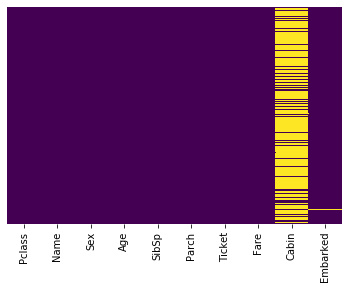

In [58]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
test.drop('Cabin',axis=1,inplace=True)

In [60]:
test.dropna(inplace=True)

In [61]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [62]:
test = pd.concat([test,sex,embark],axis=1)

In [63]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [64]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,2,8.0,1,1,36.7500,1,0,1
1,1,49.0,0,0,25.9292,0,0,1
2,3,26.0,0,0,7.7375,1,1,0
3,2,24.0,2,1,27.0000,0,0,1
4,1,36.0,0,0,26.2875,1,0,1


In [65]:
X = train.drop('Survived',axis=1)
y = train['Survived']


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [68]:
from sklearn.linear_model import LogisticRegression

In [77]:
logmodel = LogisticRegression()
logmodel.fit(X,y)

C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
logmodel.score(X,y)

0.7946026986506747

In [71]:
logmodel.score(X,y_test)

0.8009950248756219

In [79]:
predictions = logmodel.predict(test)

In [80]:
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [81]:
np.savetxt(r"C:\Users\nikhi\OneDrive\Desktop\Y_predic.csv", predictions, fmt = "%0.5f", delimiter=",")